### Grupo: NameError
#### Integrantes:

- Julián Comandé
- Omar Cardenas
- Daniel Collico
- Lucas Escudero

## 75.06/95.58 Organización de Datos - 1er cuatrimestre 2020

### TP 1: análisis exploratorio de datos

Enunciado completo: https://docs.google.com/document/d/1dv1VoTD5g1HlDLeVmfgp4fTP7fenykT-EnKnuWBCvFs/edit?usp=sharing

Se pide:

*El objetivo del primer TP es realizar un análisis exploratorio del set de datos. Queremos ver qué
cosas podemos descubrir sobre los datos que puedan resultar interesantes. Estas cosas
pueden estar relacionadas al objetivo del TP2 (predecir si un cierto tweet es real o no) o no,
ambas son de interés.*
___

# Inicialización

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# variables generales para formato de gráficos
title_fontsize = 18
label_fontsize = 14
legend_fontsize = 12

In [3]:
data_folder = './kaggle_data/'
data_file = 'train.csv'

tweets = pd.read_csv(data_folder + data_file, dtype={'target':'bool'})

tweets.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,True
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,True


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null bool
dtypes: bool(1), int64(1), object(3)
memory usage: 245.4+ KB


**Observación:** No hay valores nulos en id, text o target.

In [5]:
tweets['target'].value_counts()

False    4342
True     3271
Name: target, dtype: int64

**Observación:** Hay buena cantidad y balance de ambos valores de target, por lo que no sería un problema el tamaño de las muestras (De Moivre).

# Análisis de longitud de tweets según target

In [6]:
# Obtenemos medidas de longitudes
tweets['length'] = tweets['text'].str.len()

In [7]:
# Separamos tweets sobre desastres reales vs. los que no
tweets_truedisaster = tweets.loc[tweets['target'] == True,:]
tweets_notadisaster = tweets.loc[tweets['target'] == False,:]

In [8]:
#este código siguiente es para ver los describe() uno al lado del otro para facilitar la comparación.
tweets_stats = pd.DataFrame({ \
                     'tweets_total': tweets['length'].describe(), \
                     'tweets_truedisaster': tweets_truedisaster['length'].describe(), \
                     'tweets_notadisaster': tweets_notadisaster['length'].describe() })

tweets_stats=tweets_stats.round(decimals=1)

tweets_stats

,tweets_total,tweets_truedisaster,tweets_notadisaster
count,7613.0,3271.0,4342.0
mean,101.0,108.1,95.7
std,33.8,29.3,35.9
min,7.0,14.0,7.0
25%,78.0,88.0,68.0
50%,107.0,115.0,101.0
75%,133.0,136.0,130.0
max,157.0,151.0,157.0


**Observación:** Según vemos en estos cálculos, aquellos tweets sobre desastres tienden a ser un poco más largos.

### A continuación van varios gráficos sobre la distribución de los tweets según su longitud y si son desastres verdaderos o no.

El gráfico que me parece que ilustra mejor la distribución es el tercero, el **violinplot**.

Text(0.5, 0, 'Tweet length')

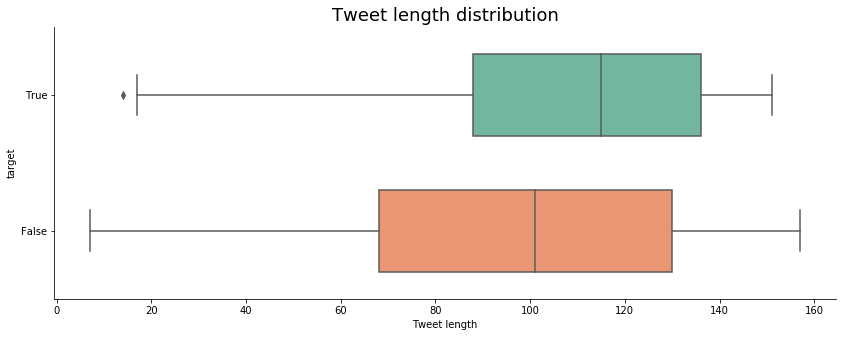

In [9]:
plt.figure(figsize=(14, 5))

ax = sns.boxplot(x=tweets['length'], y=tweets['target'], order=[True, False], orient="h", width=0.6, palette="Set2")

sns.despine()
plt.title('Tweet length distribution', fontsize=title_fontsize)
plt.xlabel('Tweet length')

---
*Las siguientes visualizaciones son otros intentos de graficar el punto 1. De todas maneras creo que el BoxPlot es el que más ejemplifica la observación.*

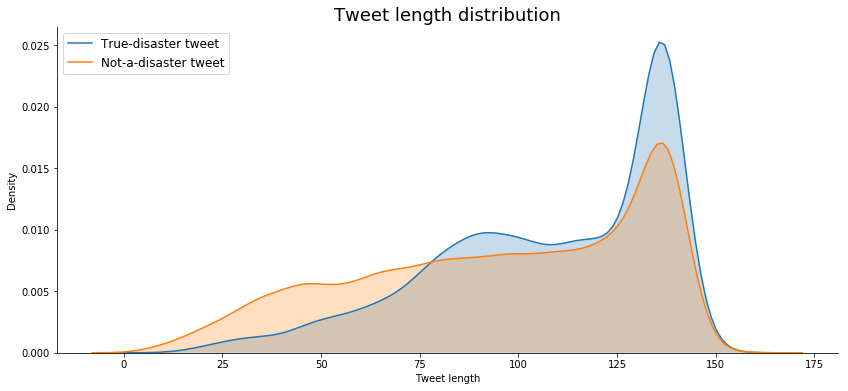

In [10]:
plt.figure(figsize=(14, 6))

# Default bandwith
#sns.kdeplot(tweets_truedisaster['length'], label='True disaster tweet', shade= True)
#sns.kdeplot(tweets_notadisaster['length'], label='Not-a-disaster tweet', shade= True)

# 'Custom' bandwith
plot_bandwith = 5
sns.kdeplot(tweets_truedisaster['length'], bw=plot_bandwith, label='True-disaster tweet', shade= True)
sns.kdeplot(tweets_notadisaster['length'], bw=plot_bandwith, label='Not-a-disaster tweet', shade= True)
    
# Plot formatting
sns.despine()
plt.title('Tweet length distribution', fontsize=title_fontsize)
plt.xlabel('Tweet length')
plt.ylabel('Density')
plt.legend(fontsize=legend_fontsize, loc='upper left')

___
Esta visualización todavía necesita trabajo... No puedo juntar ambas mitades.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


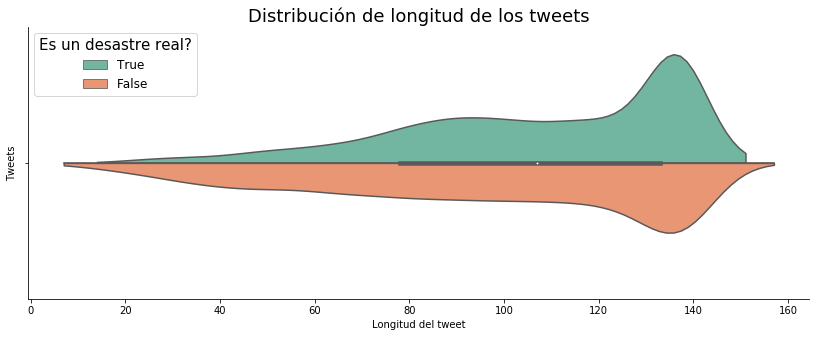

In [11]:
plt.figure(figsize=(14, 5))

ax = sns.violinplot(data=tweets, x='length', y=['Is a disaster']*len(tweets), hue='target',
                    orient="h", split=True, cut=0, legend='Full', hue_order=[True,False], palette='Set2')

sns.despine()
plt.title('Distribución de longitud de los tweets', fontsize=title_fontsize)
plt.xlabel('Longitud del tweet')
ax.set(yticklabels=[])
plt.ylabel('Tweets')
plt.legend(title='Es un desastre real?', title_fontsize=legend_fontsize*1.25, fontsize=legend_fontsize, loc='upper left')


___
# Distribución de target teniendo en cuenta valor de location

## location not-null vs location null

In [12]:
# Cuantos tweets no tienen location?
pd.isnull(tweets['location']).value_counts()

False    5080
True     2533
Name: location, dtype: int64

In [13]:
tweets_targetcount = tweets['target'].value_counts()
tweets_withlocation_targetcount = tweets.loc[~pd.isnull(tweets['location']),:]['target'].value_counts()
tweets_withoutlocation_targetcount = tweets.loc[pd.isnull(tweets['location']),:]['target'].value_counts()

tweets_targetcount.sort_index(ascending=False, inplace=True)
tweets_withlocation_targetcount.sort_index(ascending=False, inplace=True)
tweets_withoutlocation_targetcount.sort_index(ascending=False, inplace=True)

Text(0.7, 1, 'n=2533')

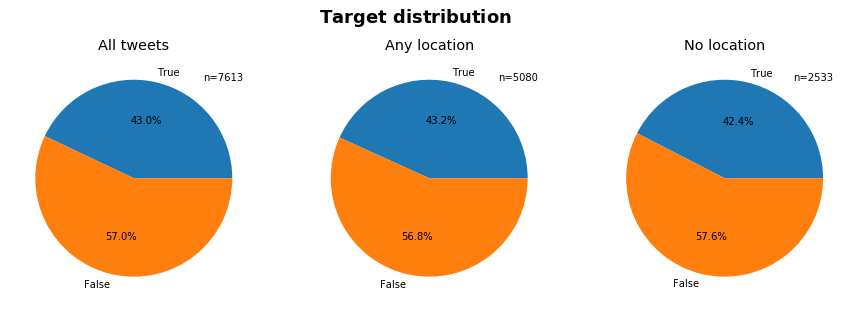

In [14]:
plt.figure(figsize=(15,5))

plt.suptitle(r'$\bf{Target\ distribution}$', fontsize=title_fontsize) # Mathmode para darle bold

plt.subplot(1, 3, 1)
plt.pie(tweets_targetcount, labels= tweets_targetcount.index, autopct='%1.1f%%')
plt.title('All tweets', fontsize=title_fontsize*0.8)
#cantidad de muestras
plt.text(.7, 1, 'n=' + str(tweets_targetcount.sum()))

plt.subplot(1, 3, 2)
plt.pie(tweets_withlocation_targetcount, labels= tweets_withlocation_targetcount.index, autopct='%1.1f%%')
plt.title('Any location', fontsize=title_fontsize*0.8)
plt.text(.7, 1, 'n=' + str(tweets_withlocation_targetcount.sum()))

plt.subplot(1, 3, 3)
plt.pie(tweets_withoutlocation_targetcount, labels= tweets_withoutlocation_targetcount.index, autopct='%1.1f%%')
plt.title('No location', fontsize=title_fontsize*0.8)
plt.text(.7, 1, 'n=' + str(tweets_withoutlocation_targetcount.sum()))

**Tener o no tener location no afecta el porcentaje de target**

In [15]:
tweets['location'].value_counts()

#nuevo dataframe que contiene cada keyword y el count
locations = tweets['location'].value_counts().to_frame()
locations.rename(columns={'location':'count'}, inplace=True)

In [16]:
# hago un join de el average de target=True, osea, el ratio de veces que es True
locations = locations.join(tweets.groupby(['location'])['target'].agg(['mean','sum']))
locations['false_count'] = locations['count'] - locations['sum']
locations.reset_index(inplace=True)
locations.rename(columns={'mean':'true_disaster_ratio', 'index':'location', 'sum':'true_count'}, inplace=True)
locations = locations.astype({"true_count": int, "false_count": int})

locations.head()

,location,count,true_disaster_ratio,true_count,false_count
0,USA,104,0.644231,67,37
1,New York,71,0.225352,16,55
2,United States,50,0.540000,27,23
3,London,45,0.355556,16,29
4,Canada,29,0.448276,13,16


In [17]:
#testeemos que este todo bien lo anterior... por ej los ratio=0 o 1
#tweets.loc[tweets['location']=='Dublin',:]

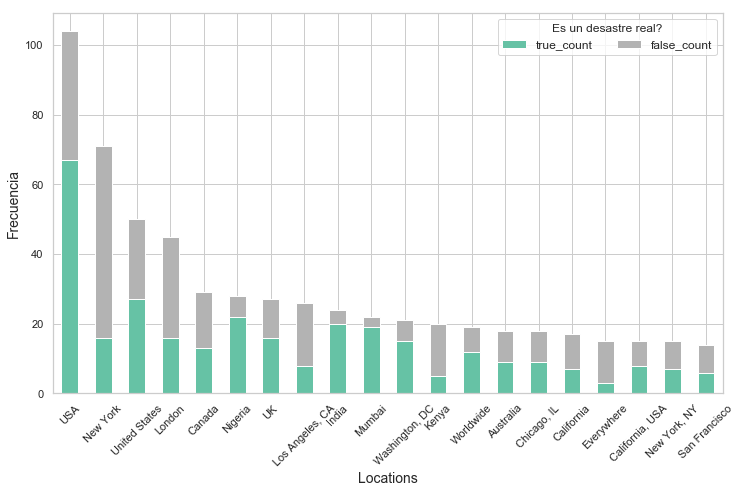

In [18]:
#grafico top 20
sns.set(style="whitegrid")

fig = locations.iloc[:20].plot(kind='bar', x='location', y=['true_count','false_count'], stacked=True,
                              figsize=(12,7), colormap='Set2')

fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.xlabel('Locations', fontsize=label_fontsize)
plt.ylabel('Frecuencia', fontsize=label_fontsize)
plt.legend(title='Es un desastre real?', title_fontsize=legend_fontsize, fontsize=legend_fontsize, ncol=2)

___
# Distribución de target teniendo en cuenta valor de keyword

In [19]:
# Cuantos tweets no tienen keyword?
pd.isnull(tweets['keyword']).value_counts()

False    7552
True       61
Name: keyword, dtype: int64

**Casi todos los tweets tienen keywords**

Vamos a analizar los keywords en general para ver la tendencia de cada uno.

In [20]:
#nuevo dataframe que contiene cada keyword y el count
keywords = tweets['keyword'].value_counts().to_frame()
keywords.rename(columns={'keyword':'count'}, inplace=True)

In [21]:
# hago un join de el average de target=True, osea, el ratio de veces que es True
keywords = keywords.join(tweets.groupby(['keyword'])['target'].agg(['mean','sum']))
keywords['false_count'] = keywords['count'] - keywords['sum']
keywords.reset_index(inplace=True)
keywords.rename(columns={'mean':'true_disaster_ratio', 'index':'keyword', 'sum':'true_count'}, inplace=True)
keywords = keywords.astype({"true_count": int, "false_count": int})

keywords.head()

,keyword,count,true_disaster_ratio,true_count,false_count
0,fatalities,45,0.577778,26,19
1,deluge,42,0.142857,6,36
2,armageddon,42,0.119048,5,37
3,body%20bags,41,0.024390,1,40
4,damage,41,0.463415,19,22


In [22]:
#testeemos que este todo bien lo anterior... por ej los ratio=0 o 1
#tweets.loc[tweets['keyword']=='aftershock',:]

In [23]:
keywords.describe()

,count,true_disaster_ratio,true_count,false_count
count,221.000000,221.000000,221.000000,221.000000
mean,34.171946,0.424890,14.610860,19.561086
std,4.786091,0.270708,9.696891,9.699209
min,9.000000,0.000000,0.000000,0.000000
25%,33.000000,0.181818,6.000000,12.000000
50%,35.000000,0.378378,13.000000,20.000000
75%,37.000000,0.666667,22.000000,28.000000
max,45.000000,1.000000,39.000000,40.000000


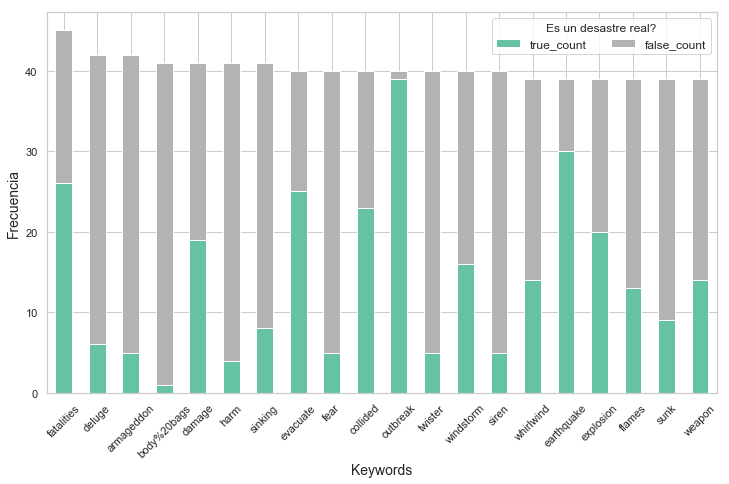

In [24]:
#grafico top 20
sns.set(style="whitegrid")

fig = keywords.iloc[:20].plot(kind='bar', x='keyword', y=['true_count','false_count'], stacked=True,
                              figsize=(12,7), colormap='Set2')

fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.xlabel('Keywords', fontsize=label_fontsize)
plt.ylabel('Frecuencia', fontsize=label_fontsize)
plt.legend(title='Es un desastre real?', title_fontsize=legend_fontsize, fontsize=legend_fontsize, ncol=2)

# Tweets con links

In [25]:
tweets_targetcount = tweets['target'].value_counts()
tweets_withhttp_targetcount = tweets.loc[tweets['text'].str.contains('http',case=False),:]['target'].value_counts()
tweets_withouthttp_targetcount = tweets.loc[~tweets['text'].str.contains('http',case=False),:]['target'].value_counts()

tweets_targetcount.sort_index(ascending=False, inplace=True)
tweets_withhttp_targetcount.sort_index(ascending=False, inplace=True)
tweets_withouthttp_targetcount.sort_index(ascending=False, inplace=True)

Text(0.7, 1, 'n=3642')

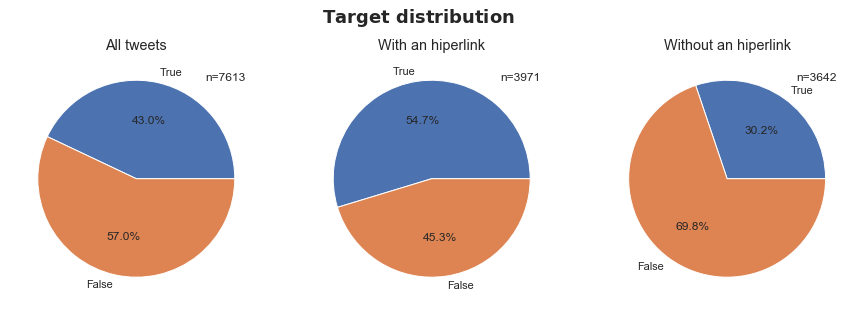

In [27]:
plt.figure(figsize=(15,5))

plt.suptitle(r'$\bf{Target\ distribution}$', fontsize=title_fontsize) # Mathmode para darle bold

plt.subplot(1, 3, 1)
plt.pie(tweets_targetcount, labels= tweets_targetcount.index, autopct='%1.1f%%')
plt.title('All tweets', fontsize=title_fontsize*0.8)
#cantidad de muestras
plt.text(.7, 1, 'n=' + str(tweets_targetcount.sum()))

plt.subplot(1, 3, 2)
plt.pie(tweets_withhttp_targetcount, labels= tweets_withhttp_targetcount.index, autopct='%1.1f%%')
plt.title('With an hiperlink', fontsize=title_fontsize*0.8)
plt.text(.7, 1, 'n=' + str(tweets_withhttp_targetcount.sum()))

plt.subplot(1, 3, 3)
plt.pie(tweets_withouthttp_targetcount, labels= tweets_withouthttp_targetcount.index, autopct='%1.1f%%')
plt.title('Without an hiperlink', fontsize=title_fontsize*0.8)
plt.text(.7, 1, 'n=' + str(tweets_withouthttp_targetcount.sum()))